In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy
import seaborn as sns


In [33]:
ds_root_mem = '../data/preprocessData/CPP/mem'
ds_root_perc = '../data/preprocessData/CPP/perc'

ds_root_mem_behavior = '../results/ddm/mem'
ds_root_perc_behavior = '../results/ddm/perc'

In [22]:
# 这个cell是为了memory
sub_dir = [f'ACC{i:03}' for i in range(14,37)]
data_CPP_all = []
for sub in sub_dir:
    data_CPP = scipy.io.loadmat(os.path.join(ds_root_mem, 'CPP_'+sub+'mem.mat'))['data_CPP_mem']
    data_CPP_all.append(data_CPP)

data_CPP_all = np.concatenate(data_CPP_all, axis=0)
data_CPP_all = pd.DataFrame(data_CPP_all)

data_behavior_mem = pd.read_csv(os.path.join(ds_root_mem_behavior, 'data4ddm_mem.csv'))
data_behavior_plot_mem = data_behavior_mem[['subj_idx','rt']]

# 合并
data_beha_CPP = pd.concat([data_behavior_plot_mem, data_CPP_all], axis=1)

# 排序
data_sorted = data_beha_CPP.sort_values('rt', ascending=False)

# 找到最长的rt并设置空集
t_max = int((data_sorted['rt'].max()+0.2)*500) #加0.2因为最长的也有到反应后0.2s
data_plot = np.zeros((data_sorted.shape[0], t_max))

# 填充的参数
data_sorted['rt_end'] = round((data_sorted['rt']+0.2)*500)
data_sorted = data_sorted.reset_index(drop=True)

#  data_sorted 的列从第3列到倒数第2列是 CPP 数据
cpp_columns = data_sorted.columns[2:-1]  # 提取 CPP 数据列

# 遍历每一行数据
for idx, row in data_sorted.iterrows():
    rt_end = int(row['rt_end'])  # 当前行的 rt_end（反应时间+0.2秒，转换为采样点）
    rt_start = max(0, (rt_end - int(1.2 * 500)))
    cpp_data = row[cpp_columns].values  # 获取当前行的 CPP 数据

    target_length = rt_end - rt_start
    if len(cpp_data) != target_length:
        cpp_data = cpp_data[-target_length:]

    data_plot[idx, rt_start:rt_end] = cpp_data



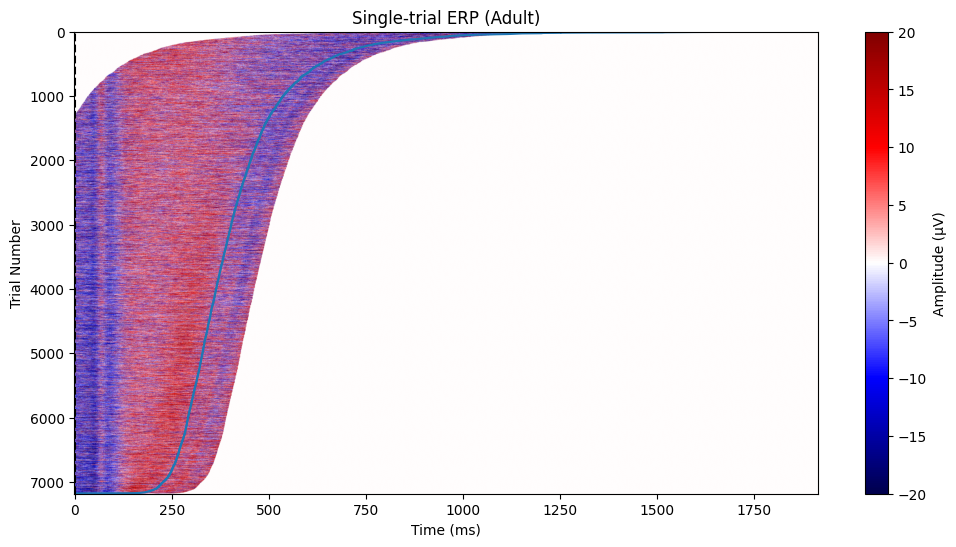

In [32]:
plt.figure(figsize=(12, 6))
plt.imshow(data_plot, 
           aspect='auto',
           cmap='seismic',
           vmin=-20, vmax=20,  # 根据实际数据调整
)

plt.plot(data_sorted['rt'].to_numpy()*500, range(len(data_sorted)))
plt.colorbar(label='Amplitude (μV)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial Number')
plt.title('Single-trial ERP (Adult)')
plt.axvline(0, color='k', linestyle='--')  # 标记刺激出现时刻
plt.show()

In [35]:
# 这个cell是为了perc
sub_dir = [f'ACC{i:03}' for i in range(14,37)]
data_CPP_all = []
for sub in sub_dir:
    data_CPP = scipy.io.loadmat(os.path.join(ds_root_perc, 'CPP_'+sub+'perc.mat'))['data_CPP_perc']
    data_CPP_all.append(data_CPP)

data_CPP_all = np.concatenate(data_CPP_all, axis=0)
data_CPP_all = pd.DataFrame(data_CPP_all)

data_behavior_perc = pd.read_csv(os.path.join(ds_root_perc_behavior, 'data4ddm_perc.csv'))
data_behavior_plot_perc = data_behavior_perc[['subj_idx','rt']]

# 合并
data_beha_CPP = pd.concat([data_behavior_plot_perc, data_CPP_all], axis=1)

# 排序
data_sorted = data_beha_CPP.sort_values('rt', ascending=False)

# 找到最长的rt并设置空集
t_max = int((data_sorted['rt'].max()+0.2)*500) #加0.2因为最长的也有到反应后0.2s
data_plot = np.zeros((data_sorted.shape[0], t_max))

# 填充的参数
data_sorted['rt_end'] = round((data_sorted['rt']+0.2)*500)
data_sorted = data_sorted.reset_index(drop=True)

#  data_sorted 的列从第3列到倒数第2列是 CPP 数据
cpp_columns = data_sorted.columns[2:-1]  # 提取 CPP 数据列

# 遍历每一行数据
for idx, row in data_sorted.iterrows():
    rt_end = int(row['rt_end'])  # 当前行的 rt_end（反应时间+0.2秒，转换为采样点）
    rt_start = max(0, (rt_end - int(1.2 * 500)))
    cpp_data = row[cpp_columns].values  # 获取当前行的 CPP 数据

    target_length = rt_end - rt_start
    if len(cpp_data) != target_length:
        cpp_data = cpp_data[-target_length:]

    data_plot[idx, rt_start:rt_end] = cpp_data



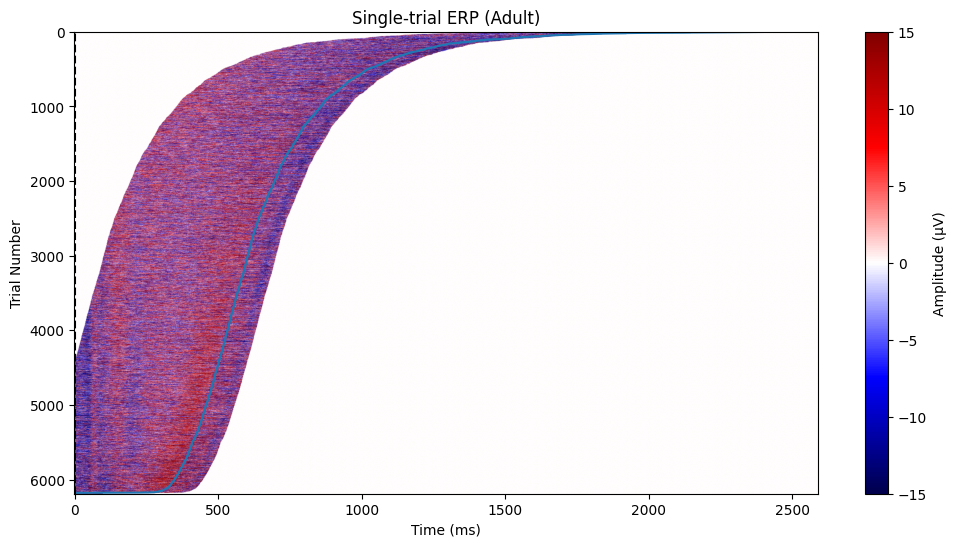

In [37]:
plt.figure(figsize=(12, 6))
plt.imshow(data_plot, 
           aspect='auto',
           cmap='seismic',
           vmin=-15, vmax=15,  # 根据实际数据调整
)

plt.plot(data_sorted['rt'].to_numpy()*500, range(len(data_sorted)))
plt.colorbar(label='Amplitude (μV)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial Number')
plt.title('Single-trial ERP (Adult)')
plt.axvline(0, color='k', linestyle='--')  # 标记刺激出现时刻
plt.show()